In [1]:
import os
import os.path
import sys 

from pathlib import Path
from glob import glob
from random import choice

import matplotlib.pyplot as plt
#import cv2
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.5.0


In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from InceptionV1Model import GetInceptionV1Model

In [4]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# data set

* [Intel Image dataset](https://www.kaggle.com/puneet6060/intel-image-classification)

In [5]:
# loading the directories 
datapath = "D:\\programing\\DataSets\\Classification\\IntelImageClassification"
dataset_path = Path(datapath)
list(dataset_path.iterdir())

[WindowsPath('D:/programing/DataSets/Classification/IntelImageClassification/data.txt'),
 WindowsPath('D:/programing/DataSets/Classification/IntelImageClassification/seg_pred'),
 WindowsPath('D:/programing/DataSets/Classification/IntelImageClassification/seg_test'),
 WindowsPath('D:/programing/DataSets/Classification/IntelImageClassification/seg_train')]

In [6]:
folders = glob(datapath+"/seg_train/seg_train/*")
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 6


In [7]:
input_shape = (150,150,3)

In [8]:
from InceptionDataLoader import DataGenerator

In [17]:
train_generator = DataGenerator(datapath+"/seg_train/seg_train", batch_size=32, dim=input_shape ,shuffle=True)
train_steps = train_generator.__len__()
train_steps

438

In [18]:
val_generator = DataGenerator(datapath+"/seg_test/seg_test", batch_size=32, dim=input_shape ,shuffle=True)
val_steps = val_generator.__len__()
val_steps

93

(32, 150, 150, 3)


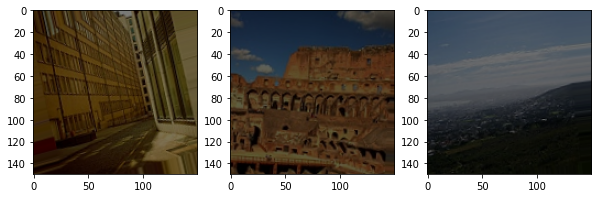

In [19]:
data = train_generator.__getitem__(1)

print(data[0].shape)
img = data[0]
plt.figure(figsize=(10,10))
for i in range(3):
    img = choice(data[0])
    plt.subplot(131+i)
    #plt.imshow(img, cmap='gray')
    plt.imshow(img)

plt.show()


In [12]:
model = GetInceptionV1Model(input_shape, out_channels=num_classes)

In [14]:
data = np.random.rand(2,150,150,3)

print(data[0].shape)

pred = model.predict(data)


(150, 150, 3)


In [15]:
mc = ModelCheckpoint(mode='max', filepath='top-weights.h5', monitor='val_dense_accuracy',save_best_only='True', save_weights_only='True', verbose=1)
es = EarlyStopping(mode='max', monitor='val_dense_accuracy', patience=10, verbose=0, restore_best_weights=True)
rl = ReduceLROnPlateau(monitor='val_dense_accuracy',factor=0.1,patience=5,verbose=1,mode="max",min_lr=0.0001)
callbacks=[mc,es,rl]

In [20]:
history = model.fit(train_generator, epochs=45,
                              validation_data=val_generator,callbacks=callbacks)

Epoch 1/45
438/438 [==============================] - 333s 757ms/step - loss: 1.9538 - dense_loss: 1.2480 - aux1_out_loss: 1.1581 - aux2_out_loss: 1.1946 - dense_accuracy: 0.4423 - aux1_out_accuracy: 0.5190 - aux2_out_accuracy: 0.4894 - val_loss: 1.8972 - val_dense_loss: 1.2292 - val_aux1_out_loss: 1.0968 - val_aux2_out_loss: 1.1299 - val_dense_accuracy: 0.4610 - val_aux1_out_accuracy: 0.5655 - val_aux2_out_accuracy: 0.5299

Epoch 00001: val_dense_accuracy improved from -inf to 0.46102, saving model to top-weights.h5
Epoch 2/45
438/438 [==============================] - 90s 205ms/step - loss: 1.6534 - dense_loss: 1.0671 - aux1_out_loss: 0.9543 - aux2_out_loss: 1.0002 - dense_accuracy: 0.5350 - aux1_out_accuracy: 0.6221 - aux2_out_accuracy: 0.5928 - val_loss: 2.7201 - val_dense_loss: 1.7564 - val_aux1_out_loss: 1.5351 - val_aux2_out_loss: 1.6774 - val_dense_accuracy: 0.3320 - val_aux1_out_accuracy: 0.4076 - val_aux2_out_accuracy: 0.3743

Epoch 00002: val_dense_accuracy did not improve f

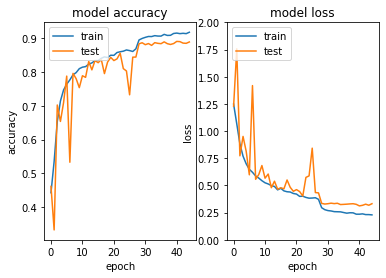

In [23]:
plt.subplot(121)
plt.plot(history.history['dense_accuracy'])
plt.plot(history.history['val_dense_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(122)
plt.plot(history.history['dense_loss'])
plt.plot(history.history['val_dense_loss'])
plt.title('model loss')
plt.ylim([0,2])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()